In [233]:
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

from IPython.display import Markdown, display
import pandas as pd
import numpy as np
import scipy as sp
import sklearn
import sys
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import random
pd.options.display.max_colwidth = 100
from operator import itemgetter
import pickle, string, re, time, os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 100

%watermark -a 'Hanif' -d -t -v -p numpy,pandas,matplotlib,gensim,nltk,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Author: Hanif

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.18.1

numpy     : 1.19.5
pandas    : 1.2.1
matplotlib: 3.3.1
gensim    : 3.8.1
nltk      : 3.4.5
sklearn   : 0.0



In [196]:
# # Loading the data
start = time.time()
data = pd.read_csv(r"E:\dataset\dfyutup-cleanedfixversion3.csv", error_bad_lines=True)
print(data)
print(start)

              Datetime  likeCount  \
0      2/24/2015 11:35          0   
1      2/24/2015 11:15          0   
2      2/24/2015 11:15          0   
3      2/24/2015 11:15          0   
4      2/24/2015 11:14          0   
...                ...        ...   
11067  2/19/2015 14:45          0   
11068  2/19/2015 14:45          0   
11069  2/19/2015 14:42          0   
11070  2/19/2015 14:38          0   
11071  2/19/2015 14:32          0   

                                                                 Comments  \
0                                      rick lu anak hasil kondom bocor ya   
1                                                       kakak itu sokpede   
2                                        gg bang slow gw sub kontol eenak   
3                                                   apa di tangan mu tatu   
4                    muka lo ekk anjing gue rugi nonton youtube lo anjing   
...                                                                   ...   
11067           

In [197]:
#We only need the Headlines_text column from the data
data_text = data[['Comments']]
datanggal = data[['Datetime']]
data_tgl = np.unique(np.array([ii[:10] for ii in datanggal['Datetime']]))

In [198]:
#data_tgl = data.date.unique()
print(data_text)
print(data_tgl)

                                                                 Comments
0                                      rick lu anak hasil kondom bocor ya
1                                                       kakak itu sokpede
2                                        gg bang slow gw sub kontol eenak
3                                                   apa di tangan mu tatu
4                    muka lo ekk anjing gue rugi nonton youtube lo anjing
...                                                                   ...
11067                                    itulah awal mula yutuber suksess
11068  aihh sedih amat tukang numpang promosi v tolol bego g guna bangsat
11069                                     mampir chanelku yg suka bokeb v
11070                                                             makasih
11071                                                   kotak kota goblok

[11072 rows x 1 columns]
['2/16/2015 ' '2/17/2015 ' '2/18/2015 ' '2/19/2015 ' '2/20/2015 '
 '2/21/2015 ' '2/22/

In [199]:
data['Comments'] = data['Comments'].astype(str)

In [200]:
os.environ['MALLET_HOME'] = 'C:/tmp/mallet-2.0.8/'

In [201]:
path_to_mallet = 'C:\\tmp\\mallet-2.0.8\\bin\\mallet'

In [202]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in data['Comments']]

In [203]:
original_trump_tweets = [title for title in data['Comments']]

In [204]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 11072
Mean Number of Words per Document: 10.6
Vocabulary Size: 11844


In [205]:
num_topics = 32

In [206]:
training_data = training_data

In [207]:
#Change to your desired output directory
output_directory_path = 'E:/dataset'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"
path_to_word_weights            = output_directory_path + '/mallet.word_weights.' + str(num_topics)
path_to_diagnostics             = output_directory_path + '/mallet.diagnostics.' + str(num_topics) + '.xml'

In [208]:
little_mallet_wrapper.import_data(path_to_mallet,
                                  path_to_training_data,
                                  path_to_formatted_training_data,
                                  training_data)

Importing data...
Complete


In [209]:
little_mallet_wrapper.train_topic_model(path_to_mallet,
                                        path_to_formatted_training_data,
                                        path_to_model,
                                        path_to_topic_keys,
                                        path_to_topic_distributions,
                                        path_to_word_weights,
                                        path_to_diagnostics,
                                        num_topics)

Training topic model...
Complete


In [210]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['makan', 'jembut', 'pink', 'guy', 'punya', 'lagi', 'ada', 'dan', 'bro', 'tai', 'ini', 'roti', 'tingkah', 'pas', 'dulu', 'tapi', 'pasti', 'sedih', 'merasa', 'pacar']

✨Topic 1✨

['haters', 'yang', 'orang', 'itu', 'dia', 'gak', 'nya', 'aja', 'bisa', 'ada', 'erick', 'dan', 'kalo', 'buat', 'punya', 'jadi', 'tapi', 'udah', 'tolol', 'apa']

✨Topic 2✨

['chanel', 'family', 'friendly', 'paling', 'tolol', 'hatters', 'channel', 'goblok', 'gak', 'ini', 'nama', 'mati', 'hapus', 'aja', 'otak', 'guna', 'idiot', 'sampah', 'bego', 'keagamaan']

✨Topic 3✨

['memek', 'bau', 'ngilu', 'bisa', 'ngakak', 'asu', 'kenapa', 'mem', 'ngeteh', 'hey', 'hmmm', 'anjingg', 'saya', 'mmk', 'lahir', 'hmm', 'ujung', 'hmmmm', 'kok', 'iya']

✨Topic 4✨

['like', 'rick', 'subs', 'ama', 'kontol', 'dislike', 'pasti', 'lah', 'itu', 'life', 'dri', 'video', 'love', 'erickolim', 'erickontol', 'klo', 'doain', 'bar', 'beli', 'trus']

✨Topic 5✨

['ada', 'nya', 'qorygore', 'foto', 'bro', 'wkwkwkwkwkwkwk', 'minta', 'ketemu'

In [211]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [212]:
tweet_dict = dict(zip(training_data, original_trump_tweets))

In [213]:
def display_top_tweets_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), tweet_dict[document] + "\n")
    return

In [214]:
display_top_tweets_per_topic(topic_number=0, number_of_documents=5)

✨Topic 0✨

['makan', 'jembut', 'pink', 'guy', 'punya', 'lagi', 'ada', 'dan', 'bro', 'tai', 'ini', 'roti', 'tingkah', 'pas', 'dulu', 'tapi', 'pasti', 'sedih', 'merasa', 'pacar']

0.8197 mamak lo lontee tmpilan kyl perek jalang makan tu jembut emak lu

0.7539 youtube just for money man 
open your eyes dude 
semua itu cuma titipan lu ngomong kasar lu ngomong sok ide seriously man itu ga ada keren kerennya 
ingat bro kesenangan dunia itu cuma sesaat 
boleh anarkis dan merasa ide bro tapi jangan kelewatan 
karma itu ada sekarang lu merasa punya segalanya kelak man di saat era lu habis dan lu punya keluarga lu pasti ngerasahin efek tingkah laku lu waktu muda seperti ini 
inget bro ga ada yg abadi 
jesus bless you

0.7522 anda makan jembud jembud makan anda

0.7356 gapapa ric lebih banyak haters makin banyak juga uanglo biarin tu haters ngomel sampe mbusa tumulut yg penting lo suksesu ga ada keren kerennya 
ingat bro kesenangan dunia itu cuma sesaat 
boleh anarkis dan merasa ide bro tapi jang

In [215]:
def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):

        probability = f"✨✨✨\n\n**{probability}**"
        original_text = tweet_dict[document]
        original_text_lowered = original_text.lower()
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text_lowered:
                original_text = re.sub(f"\\b{word}\\b", f"**{word.upper()}**", original_text, flags=re.I)

        display(Markdown(probability)), display(Markdown(original_text))
    return

In [216]:
display_bolded_topic_words_in_context(topic_number=0, number_of_documents=4)

✨Topic 0✨

['makan', 'jembut', 'pink', 'guy', 'punya', 'lagi', 'ada', 'dan', 'bro', 'tai', 'ini', 'roti', 'tingkah', 'pas', 'dulu', 'tapi', 'pasti', 'sedih', 'merasa', 'pacar']



✨✨✨

**0.819683122798156**

mamak lo lontee tmpilan kyl perek jalang **MAKAN** tu **JEMBUT** emak lu

✨✨✨

**0.7538776726630242**

youtube just for money man 
open your eyes dude 
semua itu cuma titipan lu ngomong kasar lu ngomong sok ide seriously man itu ga **ADA** keren kerennya 
ingat **BRO** kesenangan dunia itu cuma sesaat 
boleh anarkis **DAN** **MERASA** ide **BRO** **TAPI** jangan kelewatan 
karma itu **ADA** sekarang lu **MERASA** **PUNYA** segalanya kelak man di saat era lu habis **DAN** lu **PUNYA** keluarga lu **PASTI** ngerasahin efek **TINGKAH** laku lu waktu muda seperti **INI** 
inget **BRO** ga **ADA** yg abadi 
jesus bless you

✨✨✨

**0.7521982605825934**

anda **MAKAN** jembud jembud **MAKAN** anda

✨✨✨

**0.7355566231202685**

gapapa ric lebih banyak haters makin banyak juga uanglo biarin tu haters ngomel sampe mbusa tumulut yg penting lo suksesu ga **ADA** keren kerennya 
ingat **BRO** kesenangan dunia itu cuma sesaat 
boleh anarkis **DAN** **MERASA** ide **BRO** **TAPI** jangan kelewatan 
karma itu **ADA** sekarang lu **MERASA** **PUNYA** segalanya kelak man di saat era lu habis **DAN** lu **PUNYA** keluarga lu **PASTI** ngerasahin efek **TINGKAH** laku lu waktu muda seperti **INI** 
inget **BRO** ga **ADA** yg abadi 
jesus bless you

In [217]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [218]:
data['topic_distributions'] = pd.Series(topic_distributions)

In [219]:
topic_distributions_df = data['topic_distributions'].apply(pd.Series)

In [220]:
topic_distributions_df.columns = [" ".join(topic[:4]) for topic in topics]

In [221]:
data = pd.concat([data, topic_distributions_df], axis=1)

In [222]:
data['Date'] = pd.to_datetime(data['Datetime'])

In [223]:
data['year'] = pd.to_datetime(data['Date'].dt.year, format='%Y')

In [224]:
data['year-month'] = data['Date'].dt.to_period('M')

In [225]:
data['Date (by month)'] = [month.to_timestamp() for month in data['year-month']]

In [226]:
data = data.set_index('Date (by month)')

<AxesSubplot:title={'center':'Youtube Comments By Topic'}, xlabel='Date (by month)'>

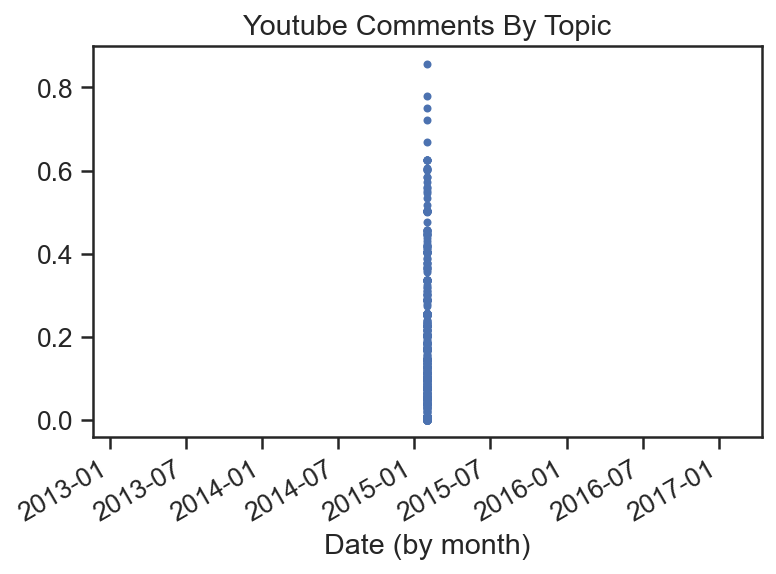

In [227]:
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

data[topic_label].plot(style='.', title='Youtube Comments By Topic')

<AxesSubplot:title={'center':'Youtube Comments By Topic'}, xlabel='Date (by month)'>

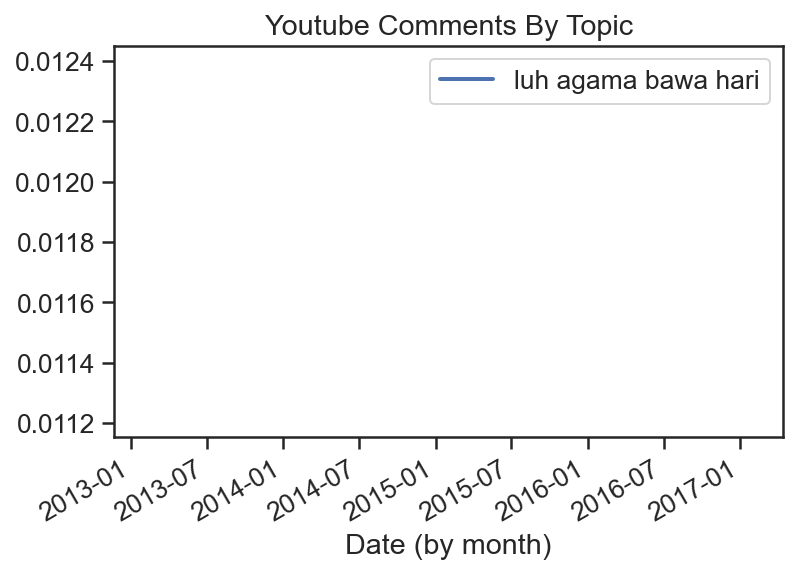

In [228]:
topic_number = 10

topic_label = " ".join(topics[topic_number][:4])

data.groupby(data.index)[[topic_label]].mean().plot(title='Youtube Comments By Topic', linewidth=2)

<AxesSubplot:title={'center':'Youtube Comments By Topic'}, xlabel='Date (by month)'>

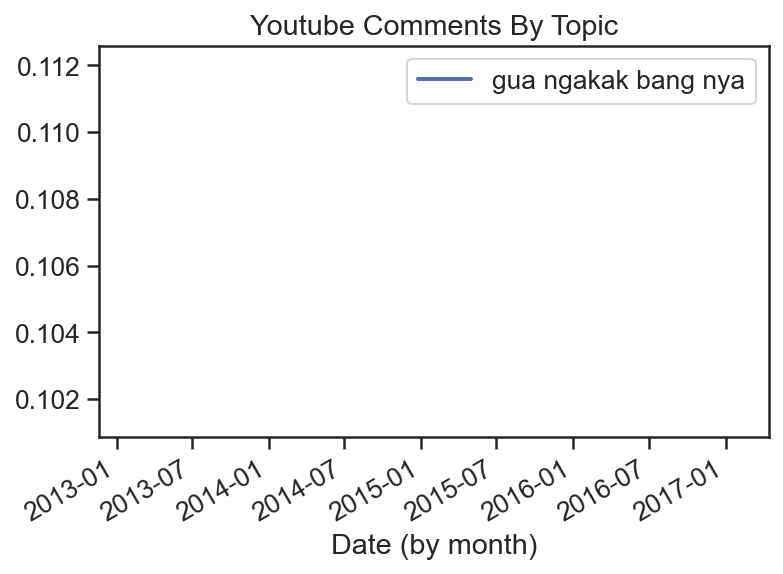

In [229]:
topic_number = 18

topic_label = " ".join(topics[topic_number][:4])

data.groupby(data.index)[[topic_label]].mean().plot(title='Youtube Comments By Topic', linewidth=2)

<AxesSubplot:title={'center':'Youtube Comments By Topic'}, xlabel='Date (by month)'>

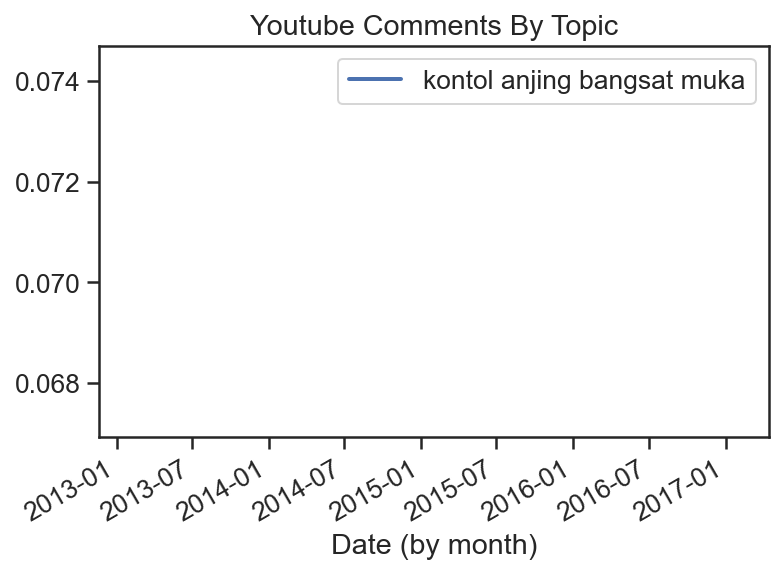

In [230]:
topic_number = 9

topic_label = " ".join(topics[topic_number][:4])

data.groupby(data.index)[[topic_label]].mean().plot(title='Youtube Comments By Topic', linewidth=2)

<AxesSubplot:title={'center':'Trump Tweets By Topic'}, xlabel='Date (by month)'>

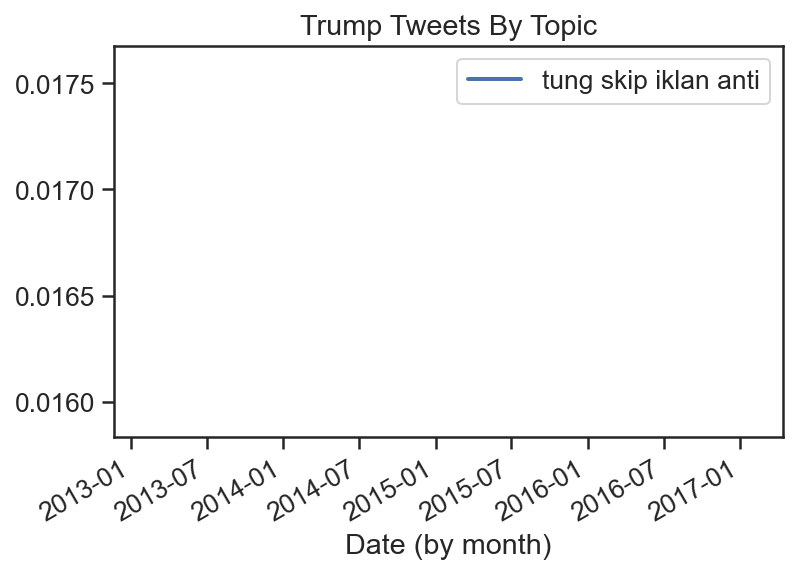

In [231]:
topic_number = 19

topic_label = " ".join(topics[topic_number][:4])

data.groupby(data.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)

<AxesSubplot:title={'center':'Trump Tweets By Topic'}, xlabel='Date (by month)'>

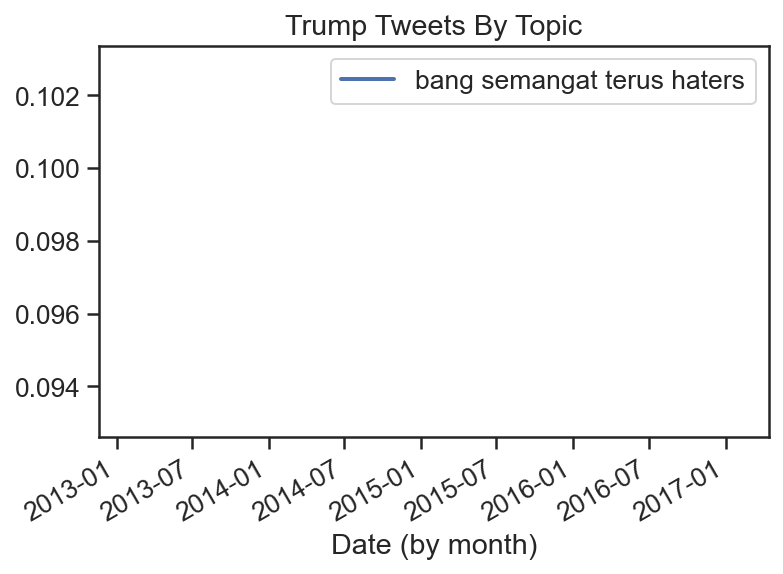

In [232]:
topic_number = 20

topic_label = " ".join(topics[topic_number][:4])

data.groupby(data.index)[[topic_label]].mean().plot(title='Trump Tweets By Topic', linewidth=2)